In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [77]:
Data = pd.read_csv("teclo.csv", header = 0)
Data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [78]:
Data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [79]:
Data.TotalCharges = pd.to_numeric(Data.TotalCharges, errors='coerce')
Data.dropna(inplace = True)

(array([5163.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1869.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

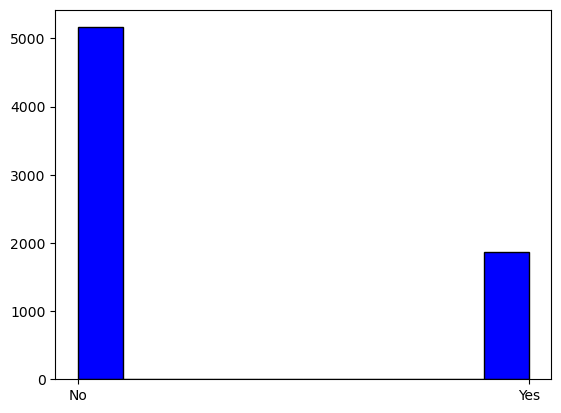

In [80]:
plt.hist(Data['Churn'], color = 'blue', edgecolor = 'black', bins = 10)

(array([3483.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3549.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

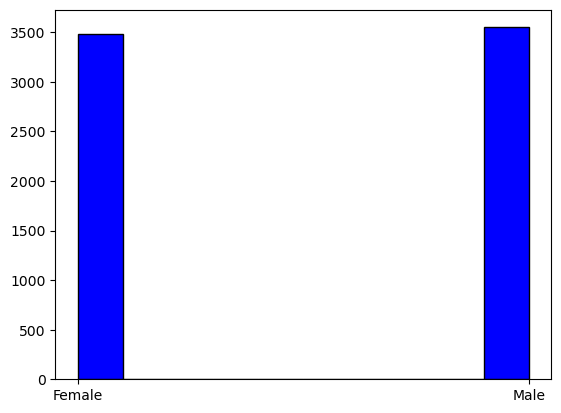

In [81]:
plt.hist(Data['gender'], color = 'blue', edgecolor = 'black', bins = 10)

(array([1600.,  191.,  365.,  637.,  472.,  894.,  952.,  869.,  758.,
         294.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <BarContainer object of 10 artists>)

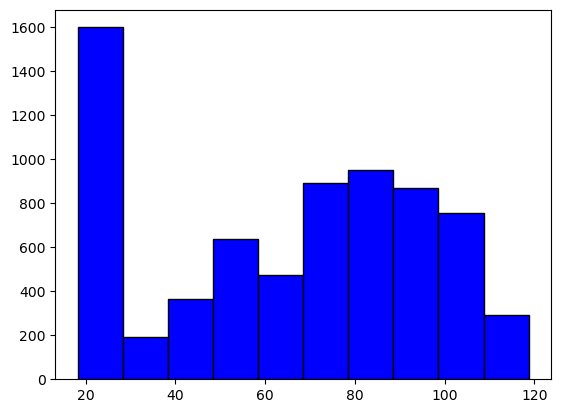

In [82]:
plt.hist(Data['MonthlyCharges'], color = 'blue', edgecolor = 'black', bins = 10)

(array([2709., 1228.,  671.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

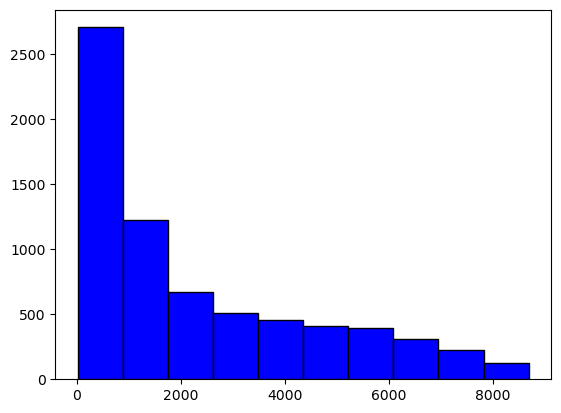

In [83]:
plt.hist(Data['TotalCharges'], color = 'blue', edgecolor = 'black', bins = 10)

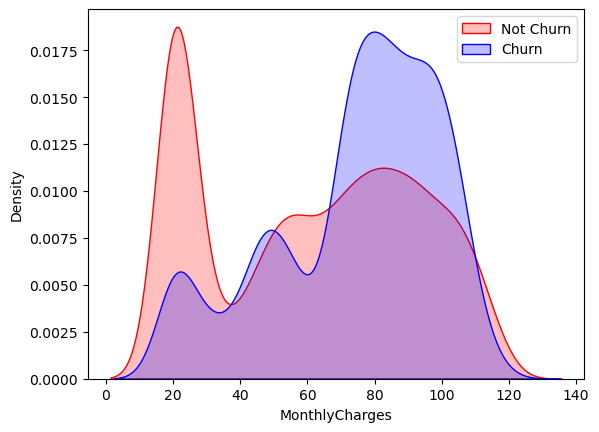

In [87]:
ax = sns.kdeplot(Data.MonthlyCharges[(Data["Churn"] == 'No')], color="Red", shade = True)
ax = sns.kdeplot(Data.MonthlyCharges[(Data["Churn"] == 'Yes')], ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')

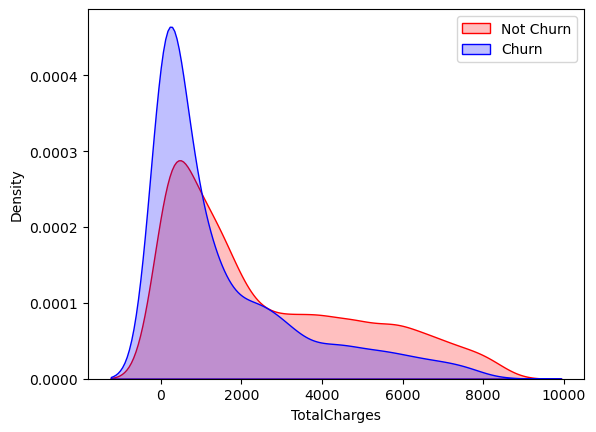

In [88]:
ax = sns.kdeplot(Data.TotalCharges[(Data["Churn"] == 'No')], color="Red", shade = True)
ax = sns.kdeplot(Data.TotalCharges[(Data["Churn"] == 'Yes')], ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')

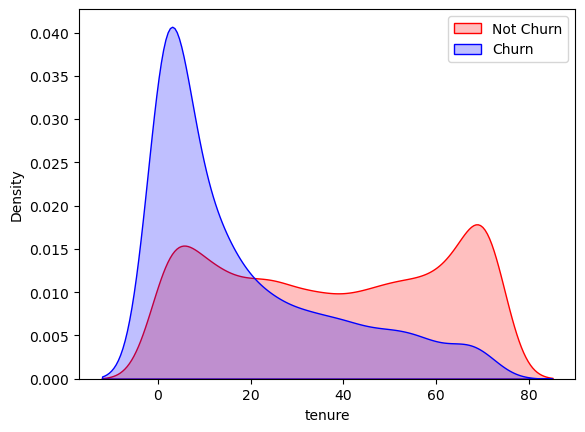

In [89]:
ax = sns.kdeplot(Data.tenure[(Data["Churn"] == 'No')], color="Red", shade = True)
ax = sns.kdeplot(Data.tenure[(Data["Churn"] == 'Yes')], ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')

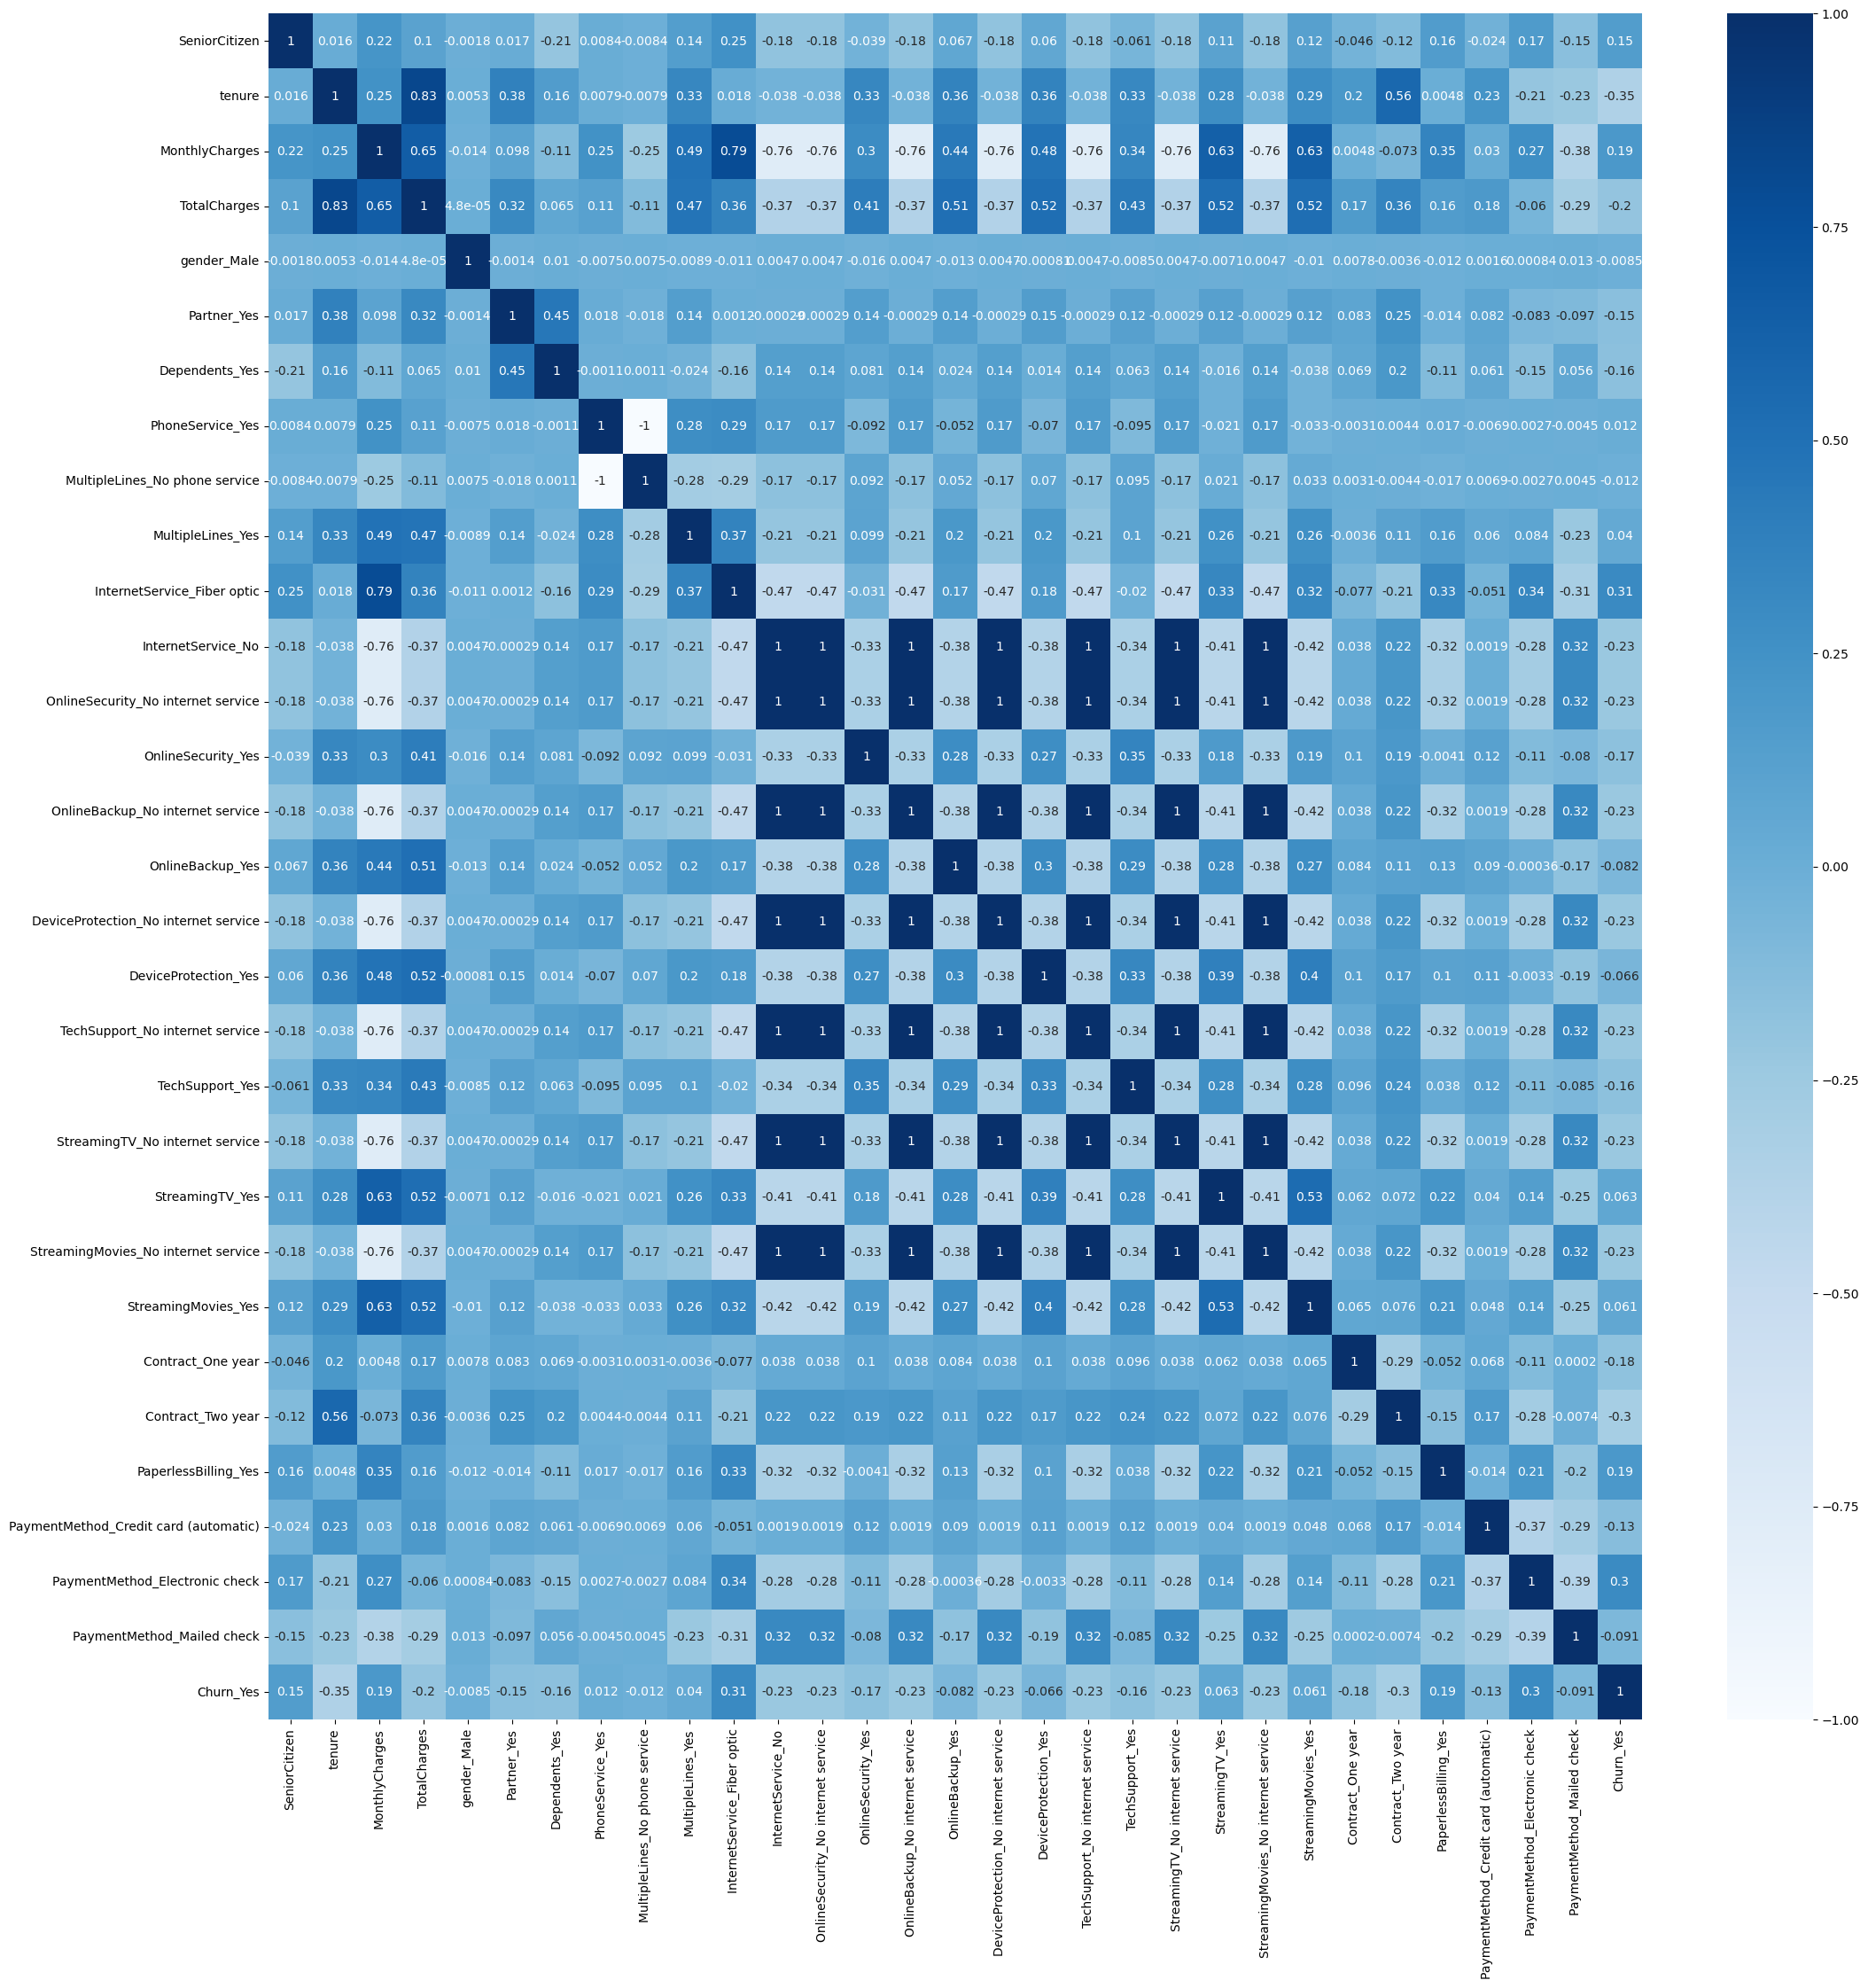

In [45]:
Data.TotalCharges = pd.to_numeric(Data.TotalCharges, errors='coerce')
Data.dropna(inplace = True)
Data = pd.get_dummies(Data.drop(columns=["customerID"]), drop_first = True)

f, ax = plt.subplots(figsize=(25, 25))
corr = Data.corr()
ax = sns.heatmap(corr, cmap="Blues", annot=True)

<AxesSubplot:>

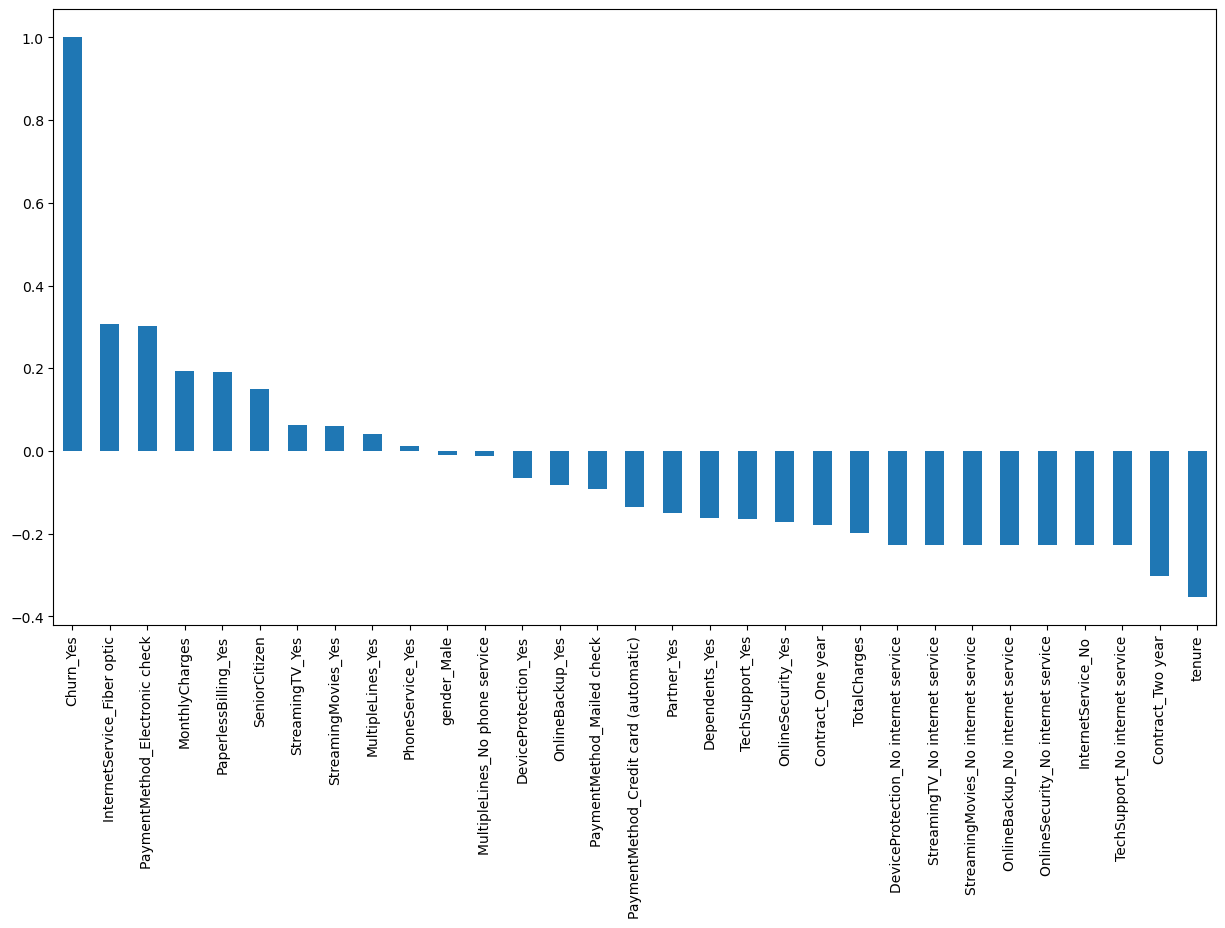

In [46]:
plt.figure(figsize=(15,8))
Data.corr()['Churn_Yes'].sort_values(ascending = False).plot(kind='bar')

In [48]:
train = Data.drop(columns = ["Churn_Yes"])
target = Data["Churn_Yes"]

In [49]:
X_train, X1, y_train, y1 = train_test_split(train, target, test_size=0.3, random_state=42, stratify=target)
X_valid, X_test, y_valid, y_test = train_test_split(X1, y1, test_size=0.5, random_state=42, stratify=y1)

In [50]:
attributes_numeric = ["tenure", "MonthlyCharges", "TotalCharges"]
numeric_pipeline = Pipeline([
    ("scaler", StandardScaler())])
preprocessing_pipeline = ColumnTransformer([
    ("numeric_preprocessor", numeric_pipeline, attributes_numeric)
], verbose_feature_names_out = False, remainder='passthrough')

In [51]:
X_train_scaled = pd.DataFrame(preprocessing_pipeline.fit_transform(X_train, y_train), columns = preprocessing_pipeline.get_feature_names_out())
X_test_scaled = pd.DataFrame(preprocessing_pipeline.transform(X_test), columns = preprocessing_pipeline.get_feature_names_out())
X_valid_scaled = pd.DataFrame(preprocessing_pipeline.transform(X_valid), columns = preprocessing_pipeline.get_feature_names_out())

In [52]:
X_train_scaled

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.833469,0.444749,-0.607066,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.508058,-1.492135,-0.823672,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,-1.240233,-0.120451,-0.950975,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.061411,-0.021293,-0.081500,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.833469,1.166949,-0.495086,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,-0.386029,-0.353472,-0.430041,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4918,1.322379,0.201812,0.993692,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4919,0.142764,0.927318,0.477390,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
4920,-0.914822,0.034897,-0.716478,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [59]:
rfc = RandomForestClassifier()
grid_space={'max_depth':[100, 200, 500, 1000, 1500, None],
              'n_estimators':[50, 100, 150, 200, 250, 300],
              'min_samples_leaf':[1,2,3]
           }
grid = GridSearchCV(rfc, param_grid=grid_space, scoring='f1')
grid_rfc = grid.fit(X_train_scaled,y_train)
val_score=grid_rfc.score(X_valid_scaled, y_valid)
print("val score:", val_score)
print("best parameters: ",grid_rfc.best_params_)
print("best score: ", grid_rfc.best_score_)

val score: 0.5848670756646217
best parameters:  {'max_depth': 1000, 'min_samples_leaf': 3, 'n_estimators': 150}
best score:  0.5838820733614045


In [67]:
rfc_final = RandomForestClassifier(n_estimators=150, min_samples_leaf=3, max_depth=1000)
rfc_final.fit(X_train_scaled, y_train)
y_test_predicted = rfc_final.predict_proba(X_test_scaled)
print(roc_auc_score(y_test, y_test_predicted[:, 1]))


0.8202741935483872


In [70]:
gbc = GradientBoostingClassifier()
grid_space = {'n_estimators': [100, 150, 200, 250],
          'max_depth': [3, 4, 5],
          'min_samples_leaf': [1, 2, 4, 5],
          'criterion': ['friedman_mse', 'squared_error'],
          'max_features': ['sqrt', 'log2'],
         }
grid = GridSearchCV(gbc, param_grid=grid_space, scoring='f1')
grid_gbc = grid.fit(X_train_scaled, y_train)
val_score=grid_gbc.score(X_valid_scaled, y_valid)
print("val score:", val_score)
print("best parameters: ",grid_gbc.best_params_)
print("best score: ", grid_gbc.best_score_)

val score: 0.5983935742971886
best parameters:  {'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 100}
best score:  0.6066174488168385


In [72]:
gbc_final = GradientBoostingClassifier(n_estimators = 100, criterion = 'squared_error', max_depth = 3, max_features = 'log2', min_samples_leaf = 1)
gbc_final.fit(X_train_scaled, y_train)
y_test_predicted = gbc_final.predict_proba(X_test_scaled)
print(roc_auc_score(y_test, y_test_predicted[:, 1]))

0.8297165898617512


In [74]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train_scaled, y_train)
y_valid_predicted = lr.predict_proba(X_valid_scaled)
print(roc_auc_score(y_valid, y_valid_predicted[:,1]))

0.8532856078788379
